Car Sales Analysis using R


In [ ]:
# Import Requried Libreries
install.packages("ggplot2")
install.packages("dplyr")
library(dplyr)
library(ggplot2)

Exploratory Data Analysis

In [ ]:
# Read Data
Car=read.csv("/content/car_sales.csv")
head(Car)

,Manufacturer,Model,Sales_in_thousands,X__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>
1,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,02-02-2012,58.28015
2,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,06-03-2011,91.37078
3,Acura,CL,14.114,18.225,Passenger,NA,3.2,225,106.9,70.6,192.0,3.470,17.2,26,01-04-2012,NA
4,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,03-10-2011,91.38978
5,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,10-08-2011,62.77764
6,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200,108.7,76.1,192.0,3.561,18.5,22,08-09-2011,84.56511


In [ ]:
head(is.na(Car),5)

Manufacturer,Model,Sales_in_thousands,X__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [ ]:
# Remove NULL's
car=na.omit(Car)

In [ ]:
car

,Manufacturer,Model,Sales_in_thousands,X__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>
1,Acura,Integra,16.919,16.360,Passenger,21.500,1.8,140,101.2,67.3,172.4,2.639,13.2,28,02-02-2012,58.28015
2,Acura,TL,39.384,19.875,Passenger,28.400,3.2,225,108.1,70.3,192.9,3.517,17.2,25,06-03-2011,91.37078
4,Acura,RL,8.588,29.725,Passenger,42.000,3.5,210,114.6,71.4,196.6,3.850,18.0,22,03-10-2011,91.38978
5,Audi,A4,20.397,22.255,Passenger,23.990,1.8,150,102.6,68.2,178.0,2.998,16.4,27,10-08-2011,62.77764
6,Audi,A6,18.780,23.555,Passenger,33.950,2.8,200,108.7,76.1,192.0,3.561,18.5,22,08-09-2011,84.56511
7,Audi,A8,1.380,39.000,Passenger,62.000,4.2,310,113.0,74.0,198.2,3.902,23.7,21,2/27/2012,134.65686
9,BMW,328i,9.231,28.675,Passenger,33.400,2.8,193,107.3,68.5,176.0,3.197,16.6,24,1/29/2012,81.87707
10,BMW,528i,17.527,36.125,Passenger,38.900,2.8,193,111.4,70.9,188.0,3.472,18.5,25,04-04-2011,83.99872
11,Buick,Century,91.561,12.475,Passenger,21.975,3.1,175,109.0,72.7,194.6,3.368,17.5,25,11-02-2011,71.18145


In [ ]:
sum(is.na(car))

[1] 0

In [ ]:
dim(car)

[1] 117  16

In [ ]:
# Chech Data Structure
str(car)

'data.frame':	117 obs. of  16 variables:
 $ Manufacturer        : chr  "Acura" "Acura" "Acura" "Audi" ...
 $ Model               : chr  "Integra" "TL" "RL" "A4" ...
 $ Sales_in_thousands  : num  16.92 39.38 8.59 20.4 18.78 ...
 $ X__year_resale_value: num  16.4 19.9 29.7 22.3 23.6 ...
 $ Vehicle_type        : chr  "Passenger" "Passenger" "Passenger" "Passenger" ...
 $ Price_in_thousands  : num  21.5 28.4 42 24 34 ...
 $ Engine_size         : num  1.8 3.2 3.5 1.8 2.8 4.2 2.8 2.8 3.1 3.8 ...
 $ Horsepower          : int  140 225 210 150 200 310 193 193 175 240 ...
 $ Wheelbase           : num  101 108 115 103 109 ...
 $ Width               : num  67.3 70.3 71.4 68.2 76.1 74 68.5 70.9 72.7 72.7 ...
 $ Length              : num  172 193 197 178 192 ...
 $ Curb_weight         : num  2.64 3.52 3.85 3 3.56 ...
 $ Fuel_capacity       : num  13.2 17.2 18 16.4 18.5 23.7 16.6 18.5 17.5 17.5 ...
 $ Fuel_efficiency     : int  28 25 22 27 22 21 24 25 25 23 ...
 $ Latest_Launch       : chr  "02-02-20

In [ ]:
# Change Datatype of Column
car <- car %>%
  mutate(Date_Column = as.Date(Latest_Launch, format = "%Y-%m-%d"))

In [ ]:
str(car)

'data.frame':	117 obs. of  17 variables:
 $ Manufacturer        : chr  "Acura" "Acura" "Acura" "Audi" ...
 $ Model               : chr  "Integra" "TL" "RL" "A4" ...
 $ Sales_in_thousands  : num  16.92 39.38 8.59 20.4 18.78 ...
 $ X__year_resale_value: num  16.4 19.9 29.7 22.3 23.6 ...
 $ Vehicle_type        : chr  "Passenger" "Passenger" "Passenger" "Passenger" ...
 $ Price_in_thousands  : num  21.5 28.4 42 24 34 ...
 $ Engine_size         : num  1.8 3.2 3.5 1.8 2.8 4.2 2.8 2.8 3.1 3.8 ...
 $ Horsepower          : int  140 225 210 150 200 310 193 193 175 240 ...
 $ Wheelbase           : num  101 108 115 103 109 ...
 $ Width               : num  67.3 70.3 71.4 68.2 76.1 74 68.5 70.9 72.7 72.7 ...
 $ Length              : num  172 193 197 178 192 ...
 $ Curb_weight         : num  2.64 3.52 3.85 3 3.56 ...
 $ Fuel_capacity       : num  13.2 17.2 18 16.4 18.5 23.7 16.6 18.5 17.5 17.5 ...
 $ Fuel_efficiency     : int  28 25 22 27 22 21 24 25 25 23 ...
 $ Latest_Launch       : chr  "02-02-20

In [ ]:
head(car)

,Manufacturer,Model,Sales_in_thousands,X__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Date_Column
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<date>
1,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,02-02-2012,58.28015,2-02-20
2,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,06-03-2011,91.37078,6-03-20
4,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,03-10-2011,91.38978,3-10-20
5,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,10-08-2011,62.77764,10-08-20
6,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200,108.7,76.1,192.0,3.561,18.5,22,08-09-2011,84.56511,8-09-20
7,Audi,A8,1.380,39.000,Passenger,62.00,4.2,310,113.0,74.0,198.2,3.902,23.7,21,2/27/2012,134.65686,NA


In [ ]:
# group same Manufacturer and then find count
count(car %>% group_by(Manufacturer))

Manufacturer,n
<chr>,<int>
Acura,3
Audi,3
BMW,2
Buick,4
Cadillac,3
Chevrolet,8
Chrysler,5
Dodge,9
Ford,10


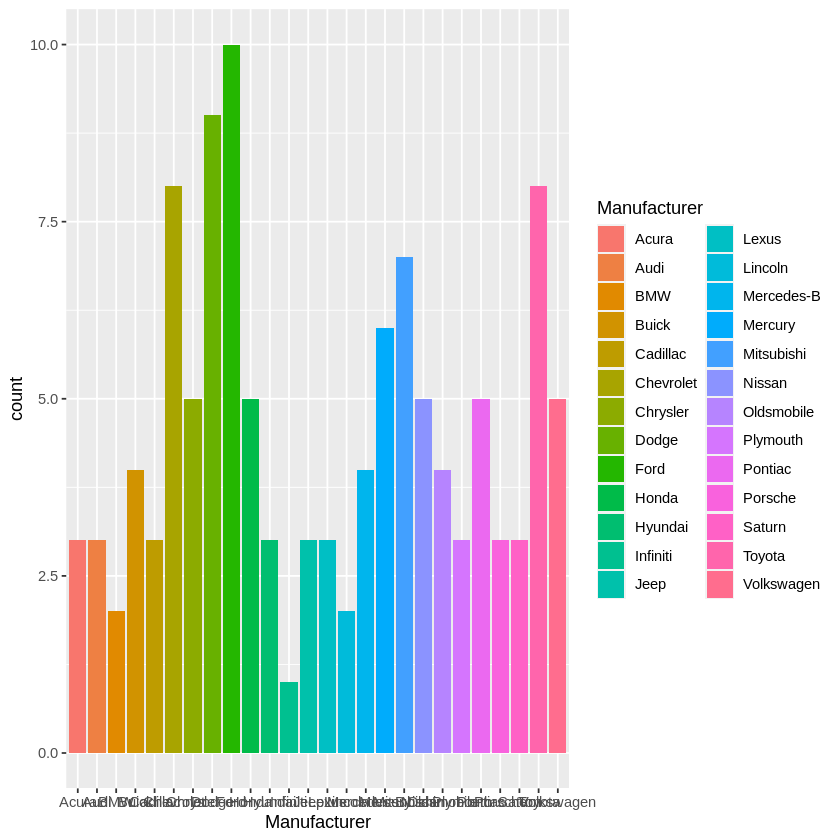

In [ ]:
# Graphical Representation count of Manufacturer using Bar Chart
ggplot(data = car,aes(x=Manufacturer,fill=Manufacturer)) + geom_bar()

In [ ]:
head(car)

,Manufacturer,Model,Sales_in_thousands,X__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Date_Column
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<date>
1,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,02-02-2012,58.28015,2-02-20
2,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,06-03-2011,91.37078,6-03-20
4,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,03-10-2011,91.38978,3-10-20
5,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,10-08-2011,62.77764,10-08-20
6,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200,108.7,76.1,192.0,3.561,18.5,22,08-09-2011,84.56511,8-09-20
7,Audi,A8,1.380,39.000,Passenger,62.00,4.2,310,113.0,74.0,198.2,3.902,23.7,21,2/27/2012,134.65686,NA


In [ ]:
# View the model column
head(car %>% select(Model))

,Model
,<chr>
1,Integra
2,TL
4,RL
5,A4
6,A6
7,A8


In [ ]:
# find the top sales of model
head(car %>% select(Model,Sales_in_thousands))

,Model,Sales_in_thousands
,<chr>,<dbl>
1,Integra,16.919
2,TL,39.384
4,RL,8.588
5,A4,20.397
6,A6,18.780
7,A8,1.380


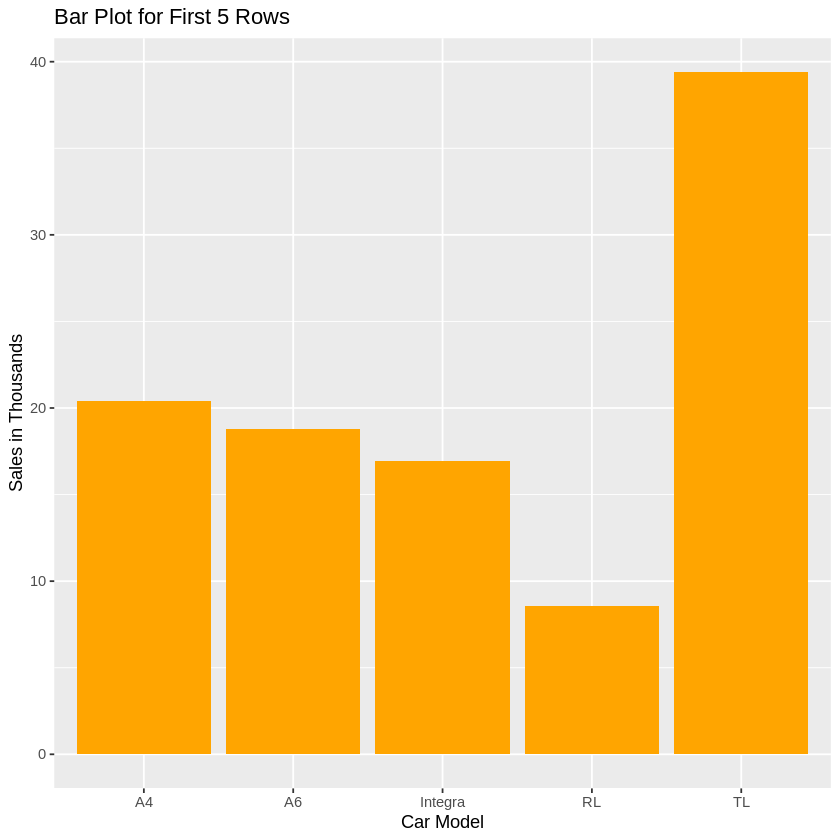

In [ ]:
# Graphical represrntation of top 5 Model Sale
ggplot(data = car[1:5, ], aes(x = Model, y = Sales_in_thousands)) +
  geom_bar(stat = "identity", fill = "orange") +
  labs(title = "Bar Plot for First 5 Rows",
       x = "Car Model",
       y = "Sales in Thousands")

In [ ]:
head(car %>% select(Model,Price_in_thousands))

,Model,Price_in_thousands
,<chr>,<dbl>
1,Integra,21.50
2,TL,28.40
4,RL,42.00
5,A4,23.99
6,A6,33.95
7,A8,62.00


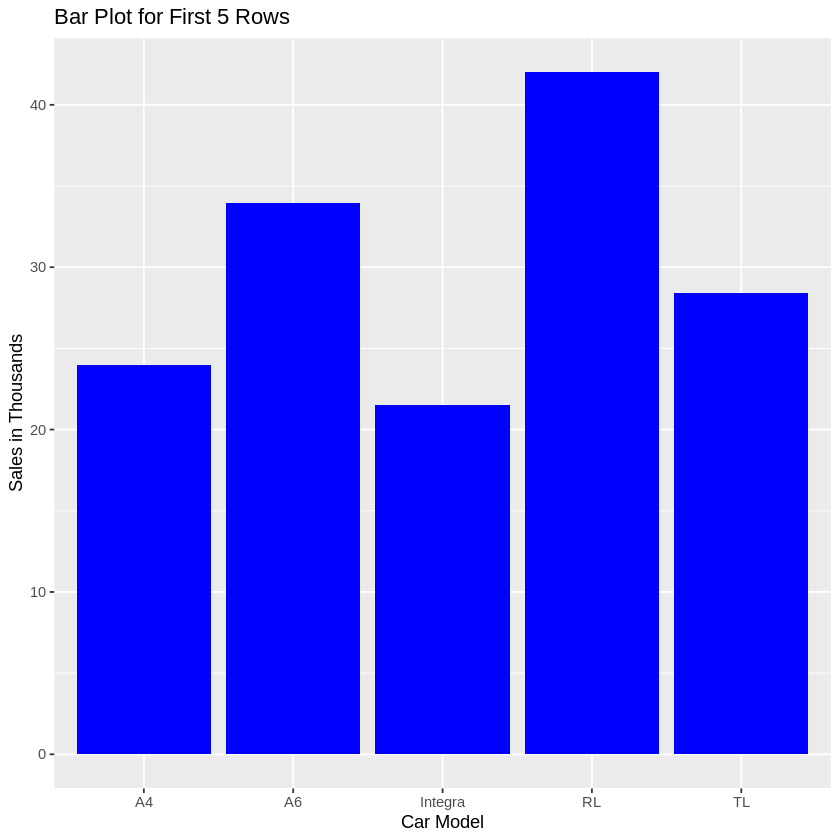

In [ ]:
# Graphical represrntation of top 5 Model Profit
ggplot(data = car[1:5, ], aes(x = Model, y = Price_in_thousands)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(title = "Bar Plot for First 5 Rows",
       x = "Car Model",
       y = "Sales in Thousands")

In [ ]:
head(car)


,Manufacturer,Model,Sales_in_thousands,X__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Date_Column
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<date>
1,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,02-02-2012,58.28015,2-02-20
2,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,06-03-2011,91.37078,6-03-20
4,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,03-10-2011,91.38978,3-10-20
5,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,10-08-2011,62.77764,10-08-20
6,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200,108.7,76.1,192.0,3.561,18.5,22,08-09-2011,84.56511,8-09-20
7,Audi,A8,1.380,39.000,Passenger,62.00,4.2,310,113.0,74.0,198.2,3.902,23.7,21,2/27/2012,134.65686,NA


In [ ]:
head(car %>% select(Date_Column,Sales_in_thousands))

,Date_Column,Sales_in_thousands
,<date>,<dbl>
1,2-02-20,16.919
2,6-03-20,39.384
4,3-10-20,8.588
5,10-08-20,20.397
6,8-09-20,18.780
7,NA,1.380


Warning message:
“Removed 77 rows containing missing values (`geom_line()`).”


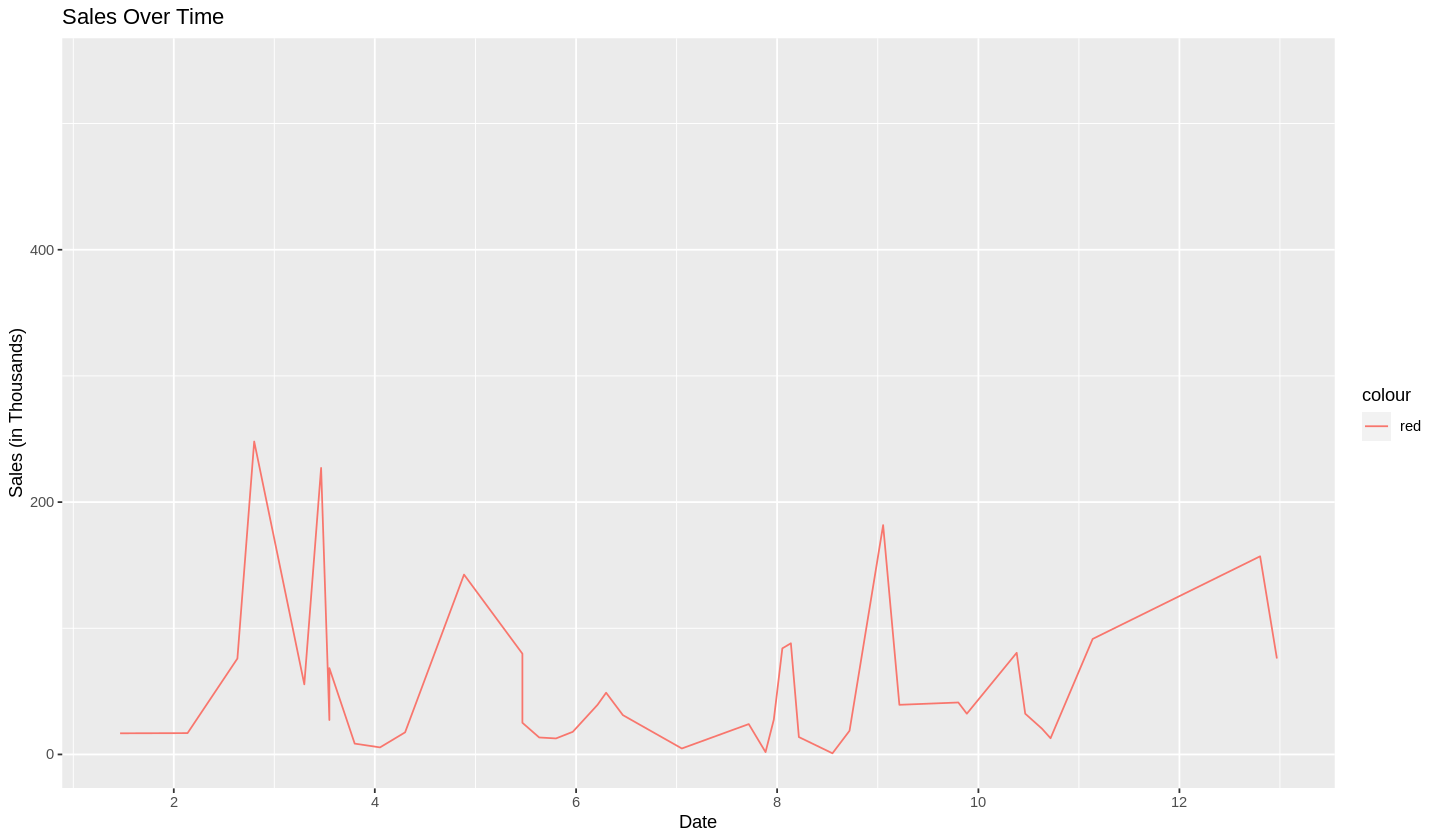

In [ ]:
# check sales over time using Line
options(repr.plot.width = 12)
ggplot(data = car, aes(x = Date_Column, y = Sales_in_thousands, color = "red")) +
  geom_line() +
  labs(title = "Sales Over Time",
       x = "Date",
       y = "Sales (in Thousands)")

In [ ]:
head(car)

,Manufacturer,Model,Sales_in_thousands,X__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Date_Column
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<date>
1,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,02-02-2012,58.28015,2-02-20
2,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,06-03-2011,91.37078,6-03-20
4,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,03-10-2011,91.38978,3-10-20
5,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,10-08-2011,62.77764,10-08-20
6,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200,108.7,76.1,192.0,3.561,18.5,22,08-09-2011,84.56511,8-09-20
7,Audi,A8,1.380,39.000,Passenger,62.00,4.2,310,113.0,74.0,198.2,3.902,23.7,21,2/27/2012,134.65686,NA


In [ ]:
count(car %>% group_by(Vehicle_type))

Vehicle_type,n
<chr>,<int>
Car,29
Passenger,88


In [ ]:
head(car
)

,Manufacturer,Model,Sales_in_thousands,X__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Date_Column
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<date>
1,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,02-02-2012,58.28015,2-02-20
2,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,06-03-2011,91.37078,6-03-20
4,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,03-10-2011,91.38978,3-10-20
5,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,10-08-2011,62.77764,10-08-20
6,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200,108.7,76.1,192.0,3.561,18.5,22,08-09-2011,84.56511,8-09-20
7,Audi,A8,1.380,39.000,Passenger,62.00,4.2,310,113.0,74.0,198.2,3.902,23.7,21,2/27/2012,134.65686,NA


In [ ]:
summary(car)

 Manufacturer          Model           Sales_in_thousands X__year_resale_value
 Length:117         Length:117         Min.   :  0.11     Min.   : 5.16       
 Class :character   Class :character   1st Qu.: 16.77     1st Qu.:11.24       
 Mode  :character   Mode  :character   Median : 32.30     Median :14.01       
                                       Mean   : 59.11     Mean   :18.03       
                                       3rd Qu.: 76.03     3rd Qu.:19.88       
                                       Max.   :540.56     Max.   :67.55       
                                                                              
 Vehicle_type       Price_in_thousands  Engine_size      Horsepower   
 Length:117         Min.   : 9.235     Min.   :1.000   Min.   : 55.0  
 Class :character   1st Qu.:16.980     1st Qu.:2.200   1st Qu.:140.0  
 Mode  :character   Median :21.665     Median :3.000   Median :175.0  
                    Mean   :25.969     Mean   :3.049   Mean   :181.3  
             

In [ ]:
car

,Manufacturer,Model,Sales_in_thousands,X__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Date_Column
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<date>
1,Acura,Integra,16.919,16.360,Passenger,21.500,1.8,140,101.2,67.3,172.4,2.639,13.2,28,02-02-2012,58.28015,2-02-20
2,Acura,TL,39.384,19.875,Passenger,28.400,3.2,225,108.1,70.3,192.9,3.517,17.2,25,06-03-2011,91.37078,6-03-20
4,Acura,RL,8.588,29.725,Passenger,42.000,3.5,210,114.6,71.4,196.6,3.850,18.0,22,03-10-2011,91.38978,3-10-20
5,Audi,A4,20.397,22.255,Passenger,23.990,1.8,150,102.6,68.2,178.0,2.998,16.4,27,10-08-2011,62.77764,10-08-20
6,Audi,A6,18.780,23.555,Passenger,33.950,2.8,200,108.7,76.1,192.0,3.561,18.5,22,08-09-2011,84.56511,8-09-20
7,Audi,A8,1.380,39.000,Passenger,62.000,4.2,310,113.0,74.0,198.2,3.902,23.7,21,2/27/2012,134.65686,NA
9,BMW,328i,9.231,28.675,Passenger,33.400,2.8,193,107.3,68.5,176.0,3.197,16.6,24,1/29/2012,81.87707,NA
10,BMW,528i,17.527,36.125,Passenger,38.900,2.8,193,111.4,70.9,188.0,3.472,18.5,25,04-04-2011,83.99872,4-04-20
11,Buick,Century,91.561,12.475,Passenger,21.975,3.1,175,109.0,72.7,194.6,3.368,17.5,25,11-02-2011,71.18145,11-02-20


In [ ]:
vechical=car %>% filter(Vehicle_type == "Car")

In [ ]:
vechical

Manufacturer,Model,Sales_in_thousands,X__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Date_Column
<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<date>
Dodge,Ram Pickup,227.061,15.060,Car,19.460,5.2,230,138.7,79.3,224.2,4.470,26.0,17,03-06-2012,90.21170,3-06-20
Dodge,Ram Wagon,16.767,15.510,Car,21.315,3.9,175,109.6,78.8,192.6,4.245,32.0,15,01-06-2012,71.13529,1-06-20
Dodge,Ram Van,31.038,13.425,Car,18.575,3.9,175,127.2,78.8,208.5,4.298,32.0,16,7/26/2012,70.07832,NA
Dodge,Dakota,111.313,11.260,Car,16.980,2.5,120,131.0,71.5,215.0,3.557,22.0,19,11/25/2011,49.64500,NA
Dodge,Caravan,181.749,12.025,Car,19.565,2.4,150,113.3,76.8,186.3,3.533,20.0,24,09-01-2011,61.22700,9-01-20
Ford,Explorer,276.747,16.640,Car,31.930,4.0,210,111.6,70.2,190.7,3.876,21.0,19,4/25/2012,87.63550,NA
Ford,Windstar,155.787,13.175,Car,21.410,3.0,150,120.7,76.6,200.9,3.761,26.0,21,2/25/2012,62.09505,NA
Ford,Expedition,125.338,23.575,Car,36.135,4.6,240,119.0,78.7,204.6,4.808,26.0,16,9/14/2012,100.02480,NA
Ford,Ranger,220.650,7.850,Car,12.050,2.5,119,117.5,69.4,200.7,3.086,20.0,23,1/14/2012,47.38953,NA


In [ ]:
count(vechical %>% group_by(Manufacturer)) %>%
  arrange(desc(Manufacturer))


Manufacturer,n
<chr>,<int>
Toyota,4
Plymouth,1
Oldsmobile,2
Nissan,2
Mitsubishi,2
Mercury,2
Jeep,3
Honda,3
Ford,5


In [ ]:
head(vechical %>% arrange(desc(Price_in_thousands)))

,Manufacturer,Model,Sales_in_thousands,X__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Date_Column
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<date>
1,Toyota,Land Cruiser,9.835,34.080,Car,51.728,4.7,230,112.2,76.4,192.5,5.115,25.4,15,9/25/2011,102.52898,NA
2,Ford,Expedition,125.338,23.575,Car,36.135,4.6,240,119.0,78.7,204.6,4.808,26.0,16,9/14/2012,100.02480,NA
3,Ford,Explorer,276.747,16.640,Car,31.930,4.0,210,111.6,70.2,190.7,3.876,21.0,19,4/25/2012,87.63550,NA
4,Mitsubishi,Montero,11.337,19.125,Car,31.807,3.5,200,107.3,69.9,186.6,4.520,24.3,18,1/17/2012,83.92082,NA
5,Oldsmobile,Bravada,20.017,19.925,Car,31.598,4.3,190,107.0,67.8,181.2,4.068,17.5,19,9/21/2011,80.51167,NA
6,Nissan,Pathfinder,42.574,17.810,Car,29.299,3.3,170,106.3,71.7,182.6,3.947,21.0,19,9/25/2011,72.29036,NA


In [ ]:
head(vechical %>% arrange(desc(Sales_in_thousands)))

,Manufacturer,Model,Sales_in_thousands,X__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Date_Column
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<date>
1,Ford,F-Series,540.561,15.075,Car,26.935,4.6,220,138.5,79.1,224.5,4.241,25.1,18,8/16/2012,89.40193,NA
2,Ford,Explorer,276.747,16.640,Car,31.930,4.0,210,111.6,70.2,190.7,3.876,21.0,19,4/25/2012,87.63550,NA
3,Dodge,Ram Pickup,227.061,15.060,Car,19.460,5.2,230,138.7,79.3,224.2,4.470,26.0,17,03-06-2012,90.21170,3-06-20
4,Ford,Ranger,220.650,7.850,Car,12.050,2.5,119,117.5,69.4,200.7,3.086,20.0,23,1/14/2012,47.38953,NA
5,Dodge,Caravan,181.749,12.025,Car,19.565,2.4,150,113.3,76.8,186.3,3.533,20.0,24,09-01-2011,61.22700,9-01-20
6,Jeep,Grand Cherokee,157.040,18.810,Car,26.895,4.0,195,105.9,72.3,181.5,3.880,20.5,19,12-10-2011,80.38778,12-10-20


In [ ]:
passenger=car %>% filter(Vehicle_type == "Passenger")

In [ ]:
head(passenger)

,Manufacturer,Model,Sales_in_thousands,X__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Date_Column
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<date>
1,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,02-02-2012,58.28015,2-02-20
2,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,06-03-2011,91.37078,6-03-20
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,03-10-2011,91.38978,3-10-20
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,10-08-2011,62.77764,10-08-20
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200,108.7,76.1,192.0,3.561,18.5,22,08-09-2011,84.56511,8-09-20
6,Audi,A8,1.380,39.000,Passenger,62.00,4.2,310,113.0,74.0,198.2,3.902,23.7,21,2/27/2012,134.65686,NA


In [ ]:
count(passenger %>% group_by(Manufacturer)) %>%
  arrange(desc(Manufacturer))

Manufacturer,n
<chr>,<int>
Volkswagen,5
Toyota,4
Saturn,3
Porsche,3
Pontiac,5
Plymouth,2
Oldsmobile,2
Nissan,3
Mitsubishi,5


In [ ]:
head(passenger %>% arrange(desc(Price_in_thousands)))

,Manufacturer,Model,Sales_in_thousands,X__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Date_Column
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<date>
1,Mercedes-B,SL-Class,3.311,58.600,Passenger,82.600,5.0,302,99.0,71.3,177.1,4.125,21.1,20,3/17/2011,139.9823,NA
2,Porsche,Carrera Cabrio,1.866,67.550,Passenger,74.970,3.4,300,92.6,69.5,174.5,3.075,17.0,23,07-11-2011,135.9147,7-11-20
3,Porsche,Carrera Coupe,1.280,60.625,Passenger,71.020,3.4,300,92.6,69.5,174.5,3.032,17.0,21,12/21/2012,134.3910,NA
4,Dodge,Viper,0.916,58.470,Passenger,69.725,8.0,450,96.2,75.7,176.7,3.375,19.0,16,08-07-2011,188.1443,8-07-20
5,Mercedes-B,S-Class,16.774,50.375,Passenger,69.700,4.3,275,121.5,73.1,203.1,4.133,23.2,21,6/13/2011,125.2739,NA
6,Audi,A8,1.380,39.000,Passenger,62.000,4.2,310,113.0,74.0,198.2,3.902,23.7,21,2/27/2012,134.6569,NA
